# 7 State random walk

In [1]:
import sys

sys.path.insert(0,'../')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from rl_algorithms.fixed_alpha_montecarlo_evaluation import (
    fixed_alpha_monte_carlo_evaluation,
)

from simulations.seven_state_random_walk import random_walk

# Run code to get optimal value function and the value function history.

In [11]:
value_function, value_function_history = fixed_alpha_monte_carlo_evaluation(
    alpha=0.001,
    episodes=100_000,
    random_walk_function = random_walk
)

100%|██████████| 100000/100000 [00:00<00:00, 402076.00it/s]


## Visualise result

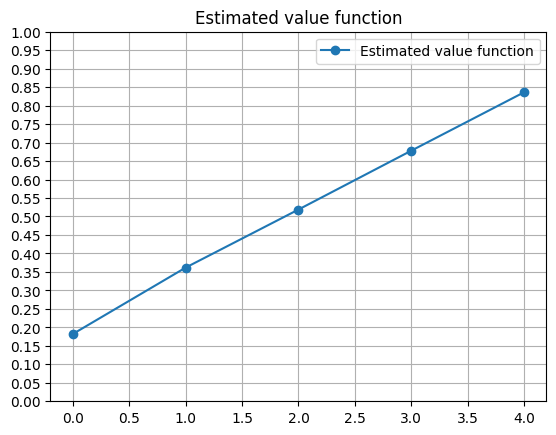

In [14]:
# list(optimal_value_function.keys()),

values = np.array(list(value_function.values()))

plt.plot(values, marker="o", label="Estimated value function")
plt.legend()
plt.ylim(0, 1)
plt.grid()
plt.yticks([0 + i / 20 for i in range(21)])
plt.title("Estimated value function")
plt.show()

# Compare this result to the known optimal value function.

In [13]:
optimal_value_function = {
    -2: 0.17433996103067698,
    -1: 0.3397749784838451,
    0: 0.5033356938013157,
    1: 0.6760016959414221,
    2: 0.8401202428860401,
}

In [15]:
# Look into difference metrics between the optimal value function and the estimated value function
optimal_values = np.array(list(optimal_value_function.values()))
mapping_func = lambda x: np.array(list(x.values()))
values = list(map(mapping_func, value_function_history))
differences = optimal_values - values
average_differenes = abs(np.array(list(map(np.mean, differences))))
std_differenes = abs(np.array(list(map(np.std, differences))))

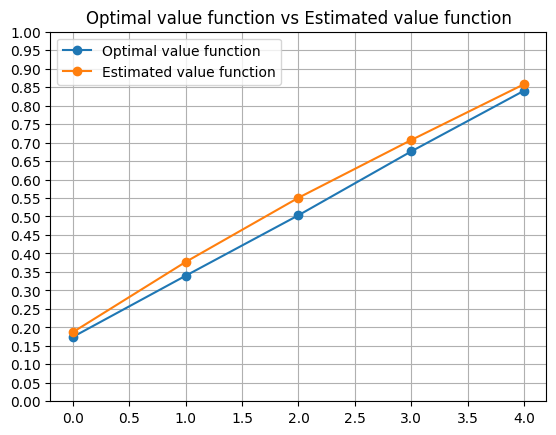

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# list(optimal_value_function.keys()),
best_index = np.argmin(average_differenes)
value_function = value_function_history[-1]

values = np.array(list(value_function.values()))

plt.plot(optimal_values, marker="o", label="Optimal value function")
plt.plot(values, marker="o", label="Estimated value function")
plt.legend()
plt.ylim(0, 1)
plt.grid()
plt.yticks([0 + i / 20 for i in range(21)])
plt.title("Optimal value function vs Estimated value function")
plt.show()

/var/folders/rs/n0b1pnpj6z179vspmqr5y_f00000gn/T/ipykernel_75390/1728434264.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


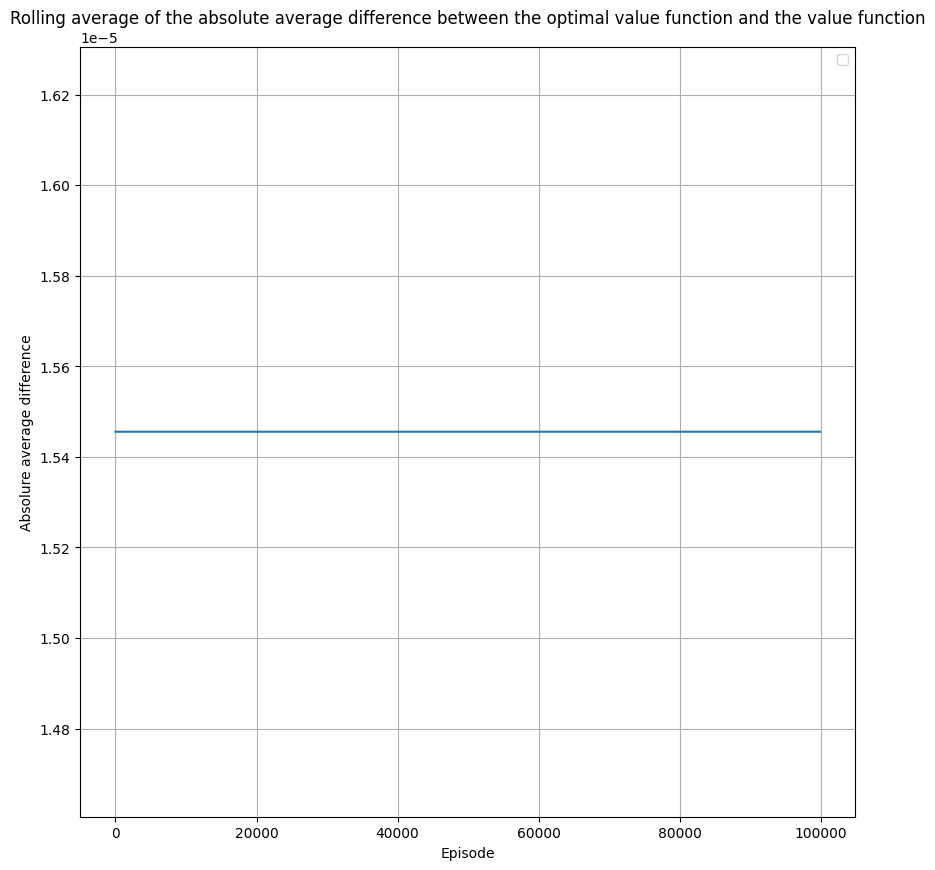

In [23]:
# Calculate a rolling average of the normalised diff
rolling_average = np.convolve(average_differenes, np.ones(100_000), "valid") / 100_000
plt.figure(figsize=(10, 10))
plt.plot(rolling_average)
plt.title(
    "Rolling average of the absolute average difference between the optimal value function and the value function"
)
plt.ylabel("Absolure average difference")
plt.xlabel("Episode")
plt.grid()
# plt.yticks(np.linspace(0, 0.015, 20))
# plt.axhline(
#     np.mean(rolling_average),
#     color="red",
#     lw=2,
#     label="Average absolute average difference",
# )
plt.legend()
plt.show()

## Animation of convergence (takes a while)

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
# Step 3: Initialize the plot
fig, ax = plt.subplots()
(line1,) = ax.plot([], [], "r-", marker = 'o', label="Optimal value function")
(line2,) = ax.plot([], [], "g-", marker = 'o', label="Estimated value function")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 4)
plt.grid()
plt.yticks([0 + i / 20 for i in range(21)])


# Step 4: Define the initialization function
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2


# Step 5: Define the update function
def update(frame):
    ax.set_title(f"Iteration {1000*frame}")
    values = np.array(list(value_function_history[frame].values()))
    line1.set_data(range(len(optimal_values)), optimal_values)
    line2.set_data(range(len(values)), values)
    return line1, line2


# Step 6: Create the animation
ani = FuncAnimation(
    fig, update, frames=range(len(value_function_history)), init_func=init, blit=True
)

# Step 7: Save the animation
Writer = animation.writers["ffmpeg"]
writer = Writer(fps=15, metadata=dict(artist="Me"), bitrate=1800)
ani.save("animation.mp4", writer=writer)
